### About the Problem

With the golden age of internet and AI, the information and the opportunities accessible to humans keeps on increasing every day and thus, we humans live in an era where we can work from anywhere, easily transfer money to anybody anywhere within a minute, take help of AI models and agents to improve productivity, start our online businesses and this list keeps going on and on.  

But every coin has two sides, with the positives this new era has brought there comes a sever negative side as well. The increase of internet and AI usage brings a load of online scams like UPI payment scams, job scams, AI deep fakes etc.  

As time goes by, more and more people are regularly interacting on internet, using the power of internet to make their life easier, better and more entertaining like online ordering of products, online bookings for restaurants, watching reels on social media for instant gratification etc. As the number of online interactions and transaction increase the chance of frauds increase as well and thus, more proactive and smart measures are needed to identify these frauds as early as possible and identify ways to prevent them.

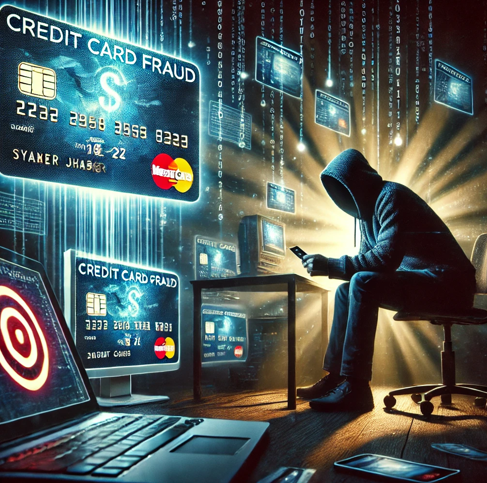

One very common scam is **CREDIT CARD FRAUD** which is basically the act of using another person’s credit card to make purchases or request cash advances without the cardholder’s knowledge or consent. Credit card fraud is increasingly prevalent, with projections from the Nilson Report estimating losses that could soar to an astonishing $38.5 billion by 2027.  

This can happen through many ways like RFID cloning of credit card chips, physical theft of card, credit card data leakage, account information leak, fake calls behaving as banks asking for sensitive information and identitiy theft. No matter how your card details got out, one thing we can say about all these is that the fradulent transaction that would occur afterwards will most likely be significantly different from other purchases you have done earlier.  

Using the advent of big data(multiple customer's transaction data) and the power of Machine learning(ML), we can automate the process of identifying patterns associated with these fradulent transactions which help us differentiate them from normal transactions and thus, can help the credit card issuer deny these fradulent transactions or require stronger identity verification, if and when detected. It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.  

Having dynamic systems in place that can achieve this will help:  
1. Provide financial protection for both cardholder and financial institution.  
2. Improve customer trust and maintain reputation of the company.  
3. Adhere to Legal compliance.  
4. Gain insights into the fraud patterns, spread awareness and develop strategies to mitigate them.

### About the Dataset

**Information as provided by the dataset creator:**

The dataset contains transactions made by credit cards in September 2013 by European cardholders.  

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.  

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.  

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.

Dataset link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

### Objective for project

Some key things that I want to achieve with this project:  
1. Learn about credit card fraud detection and its intricacies.  
2. Develop an end-to-end ML project with deployment in AWS cloud.  
3. Try anomaly detection algorithms(maybe).
4. Use modular coding and proper documentation.  
5. Develop a small Flask web app which can be used as a web interface for training and prediction on new data.
6. Use git and github for version control. 
7. Use Docker for creating app's docker image.   
8. Practice, practice and practice.

If anyone's interested, they can check out following github repo for the end-to end implementation of this project: https://github.com/Sharma-Ayush/Credit-Card-Fraud-Detection.git

<u>PS:</u>  
- Feel free to contact me if you have any doubts or feedback through the comment section or my socials.
- Please upvote the notebook if you like it, as it would motivate me to develop more projects like these.

### Objective for this notebook

The objective for this notebook is:  
- Loading and understanding the dataset.  
- Data cleaning and manipulation.  
- Custom functions to enhance reusability and implement modular programming.  
- Train test split for predictive modeling.  
- Exploratory data analysis.  
- Feature Selection using statistical tests.  
- Feature Engineering.

### Socials

Follow me on these platforms, for more such content:  

LinkedIn: https://www.linkedin.com/in/ayush-sharma-660831125/  
Github: https://github.com/Sharma-Ayush  
Kaggle: https://www.kaggle.com/ayushsharma0812

### Import Required Libraries

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For statistics
from scipy.stats import ttest_ind
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Loading data and quick glance

In [2]:
# Loading the dataset
df = pd.read_csv('Data/creditcard.csv')

In [3]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 284807 rows and 31 columns


A mid-size dataset

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Print info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

The dataset contains following columns:  

1. <u>Time:</u> The number of seconds elasped in between the times when the current transaction happened and the first transaction or earliest transaction of this dataset.  

2. <u>V1 to V28:</u> Information related to transactions and customers apart from time and amount has been encoded into a PCA transformation to preserve confidentiality. Not aware if the dimensionality has been reduced or not after PCA. Information about scaling of the original features before PCA also isn't provided. It could be a loss of critical information if the features were note scaled before PCA and dimensions were reduced after PCA.  

3. <u>Amount:</u> The amount of the transaction. The exact currency present here is not given. But most likely based on the fact that wordline is headquartered in France and the data as given is for Europe cardholders, Euro is the most likely option or maybe the data is from different part of Europes converted into one common currency but that should be unlikely as you would ideally want to investigate frauds based on regions as that would have high influence or if the region is also encoded then I am not aware of that.  

4. <u>Class:</u> Target variable indicating whether the transaction is fraud or not. Encoded with binary encoding, 1 stands for fraud and 0 for genuine transactions.


In [6]:
# Checking the distribution of the data types of features
df.dtypes.value_counts()

float64    30
int64       1
Name: count, dtype: int64

In [7]:
# Checking which columns have data type as int64
df.dtypes[df.dtypes == 'int64']

Class    int64
dtype: object

Only numerical columns exist. The only column which has integer data type is our target feature itself.

In [8]:
# Checking for nulls
df.isnull().sum().value_counts()

0    31
Name: count, dtype: int64

There are no null values.

In [9]:
# Checking for duplicates
df.duplicated().sum()

np.int64(1081)

There are 1081 duplicate transactions within our dataset. Is this possible? First of all, since we don't have info about original features, it is hard to say so. Assuming ideally that transactional data and customer data were PCA transformed, then duplicates shouldn't exist until two transactions from same customer, for same products and everything else occurred at the exact same time. This should be talked upon with the domain expert whether this can be genuine or not. For now, I will drop the duplicates as they will otherwise dominate our training of ML models and for now it looks like to me that these might be due to error.

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 283726 rows and 31 columns


Lastly, lets look at the distribution of the target column.

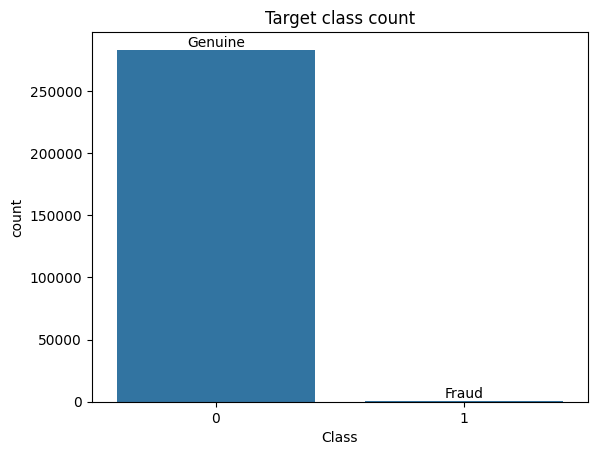

In [12]:
ax = sns.barplot(x = df['Class'].value_counts().index, y = df['Class'].value_counts())

# Add custom labels
ax.bar_label(ax.containers[0], labels=['Genuine', 'Fraud'])
plt.title('Target class count');

In [13]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

Highly imbalanced dataset, will need to employ class imbalance handling techniques. If not handled the models would likely dominate towards the genuine transactions and ignore fraud transactions. This will lead to good performance on genuine transactions but poor for fraudulent transactions which is our goal. 

### Train-test split

Before we go towards EDA, lets first split the dataset into train and test dataset so that during our EDA and predictive modeling process the information contained within test dataset is not seen by us and thus, we are not biased towards it in any way and it stays as an unseen dataset and a good representative of the the real world data and thus, ideal for final performance evaluation.  

Since the dataset is highly imbalanced, we will use stratified sampling for the split so that sufficient amount of fraudulent transactions go into the test dataset. If we would have random sampled then the imbalance might have lead to inadequate representation of fraudulent cases in the test dataset.  

We will save the datasets in .csv files so that they are as it is accessible for predictive model notebook.  

Lastly, since the dataset is mid-size with around 2.83 Lakh records and the number of fraudulent cases being just 473, I want a train-test split ratio such that a decent amount of sample size for frauds goes into test set so that its a decent representative of population. A split of 80%:20% as train-test split feels alright here. 

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Class', axis = 1), df['Class'], stratify = df['Class'], test_size = 0.33, random_state = 42)

df_train = pd.concat([X_train, Y_train], axis = 1)
df_train.to_csv('Data/creditcard_train.csv', index = False)

df_test = pd.concat([X_test, Y_test], axis = 1)
df_test.to_csv('Data/creditcard_test.csv', index = False)

In [15]:
del X_train, Y_train, X_test, Y_test, df_test

Now, we are ready for EDA.

### Custom Functions

In [16]:
def two_sample_t_test(data:pd.DataFrame, num_col:str, target_col:str) -> float:
    '''Conduct two sample t-test for num_col with respect to categories of target_col and return the p-value in case the target categories are exactly 2 otherwise return None.'''

    if data[target_col].nunique() == 2:

        cat_1, cat_2 = data[target_col].unique()

        data_1 = data[num_col][data[target_col] == cat_1]
        data_2 = data[num_col][data[target_col] == cat_2]

        std_1, std_2 = data_1.std(), data_2.std()

        if (std_1/std_2 > 2) or (std_1/std_2 < 0.5):
            # unequal variance
            t_test = ttest_ind(a = data_1, b = data_2, equal_var = False)
        else:
            # equal variance
            t_test = ttest_ind(a = data_1, b = data_2, equal_var = True)

        return t_test.pvalue
    else:
        return None

In [17]:
def describe_num_col(data:pd.DataFrame, num_col:str) -> None:
    '''Print description of numerical column.'''

    print(f'Description of {num_col}:')
    print(data[num_col].describe())

In [18]:
def plot_hist_for_num_col(data:pd.DataFrame, num_col:str, target_col:str, color_mapping:dict = None, bins:int = 10) -> None:
    '''Plot histogram for num_col and a kernel density plot segregated and normalized per category of target_col with given color mapping.'''
    
    fig, ax = plt.subplots(2, 1, figsize = (6, 6), sharex = True)
    
    # Top plot
    sns.histplot(data, x = num_col, kde = True, bins = bins, ax = ax[0], fill = True, alpha = 0.5)
    ax[0].set_title(f'Histogram of {num_col}')

    # Bottom plot
    if color_mapping == None:
        sns.kdeplot(data, x = num_col, hue = target_col, common_norm = False, fill = True, alpha = 0.5, ax = ax[1])
    else:
        sns.kdeplot(data, x = num_col, hue = target_col, common_norm = False, fill = True, alpha = 0.5, ax = ax[1], palette = color_mapping)
    ax[1].set_title(f'Density plot of {num_col}')
    ax[1].set_ylabel('Density')
    
    # Show the figure
    plt.show();

In [19]:
def plot_univariate_num(data:pd.DataFrame, num_col:str, target_col:str, stat_sign_thresh:float, color_mapping:dict = None, bins:int = 10, t_test:bool = True, describe:bool = True, plot_hist:bool = True) -> None:
    '''Conduct two sample t-test.
       Print the description of the column.
       Plot histogram for num_col and a kernel density plot segregated and normalized per category of target_col with given color mapping.'''
    
    # Coducting two sample t-test
    if t_test:
        pvalue = two_sample_t_test(data, num_col, target_col)

        print(f'P-value for two sample t-test: {pvalue}')

        if pvalue <= stat_sign_thresh:
            print(f'Based on the statistical significance level of {stat_sign_thresh}, the difference in means is statistically significant.')
        else:
            print(f'Based on the statistical significance level of {stat_sign_thresh}, the difference in means is not statistically significant.')
            
        print('\n')
        
    # Describing the numerical column
    if describe:
        describe_num_col(data, num_col)
        print('\n')
    
    # Plotting the visualizations
    if plot_hist:
        plot_hist_for_num_col(data, num_col, target_col, color_mapping, bins)

In [20]:
def plot_hist_for_multi_num_cols(data:pd.DataFrame, num_cols:list, target_col:str, color_mapping:dict = None, bins:int = 20) -> None:
    '''Plot histogram and a kernel density plot segregated and normalized per category of target_col with given color mapping for multiple numerical columns.'''
    
    # Calculate number of figures needed for 5 columns per figure or lesser
    no_of_figures = len(num_cols) // 5

    if len(num_cols) % 5 != 0:
        no_of_figures += 1

    # Plotting the histograms and density plots
    for i in range(no_of_figures):
        columns_to_plot = num_cols[i*5:(i+1)*5]

        fig, ax = plt.subplots(2, len(columns_to_plot), figsize = (len(columns_to_plot)*6, 6), sharex = True)

        for index, col in enumerate(columns_to_plot):

            # Top plot
            sns.histplot(data, x = col, bins = bins, ax = ax[0][index], fill = True, alpha = 0.5)
            ax[0][index].set_title(f'{col}')

            # Bottom plot
            if color_mapping != None:
                sns.kdeplot(data, x = col, hue = target_col, common_norm = False, fill = True, alpha = 0.5, ax = ax[1][index], palette = color_mapping)
            else:
                sns.kdeplot(data, x = col, hue = target_col, common_norm = False, fill = True, alpha = 0.5, ax = ax[1][index])
            ax[1][index].set_ylabel('Density')

        plt.subplots_adjust(wspace = 0.25)

        plt.show();

In [21]:
def handle_multi_collinearity(data, num_cols, threshold = 10):
    '''Iteratively, calculate VIF and drop columns in a copy of the dataset one by one with maximum vif if the maximum is greater than given threshold.
    Return the list of remaining columns after handling multi-collinearity.'''
    count = 0
    data_num = data[num_cols].copy()
    while True:
        vif = pd.DataFrame()
        vif["variables"] = data_num.columns
        vif["VIF"] = [variance_inflation_factor(data_num.values, i) for i in range(data_num.shape[1])]
        max_vif = np.max(vif["VIF"])
        if max_vif > threshold:
            index = np.argmax(vif["VIF"])
            data_num.drop(columns = vif.loc[index, "variables"], inplace = True)
            count += 1 
        else:
            break
    if count == 0:
        print('No columns dropped')
    else:
        print(f'Number of columns dropped = {count}')
    print("Final VIF:\n", vif)
    return data_num.columns

### Exploratory Data Analysis(EDA)

#### Univariate Data Analysis

The objective of this section is:  
1. Understand how different predictor features are distributed and at the same time understand how the value of these predictor features influences our target variable.  
2. Understand if there are any predictor features which do not have significant influence on the target variable. If found so, we can remove them in case they don't have significant influence as that will help reduce the model size, computation needed and storage needed as well.  
3. Identify if we need to perform some transformations on our predictor variables that will help improve prediction performance.  
4. Sales by region for transaction tables, YoY improvement in sales etc., these types of questions are not possible here as the features are encoded features and thus, we are not aware of the true meaning from a business perspective.  

We will take help of descripive statistics, visulaizations, and statistical tests to understand the data better.  

Since we have a binary target variable that means there are two categories only and all the predictor variables in these cases are numerical variables. We can use two sample t-test of mean difference in between the samples corresponding to each target class. But we need to take care of one thing and it is that we are conducting multiple t-tests by taking each predictor variable and our target variable as a pair. This increases the chance of a false positive when multiple comparisons are made on the same data. I will use Bonferroni correction method which will adjust an individual tests significance level by dividing it with the number of tests to be made. This will decrease the chance of making false positive conclusions.  

There are 30 predictor columns and thus, 30 t-tests are to be performed. Taking the conventional significance level of 0.05, I will divide it by 30 to reach a significance threshold 0.00167 for each test.

In [22]:
t_test_stat_sign_lvl = 0.00167

Just for EDA, I will create new target column with appropriate categorical mapping.

In [23]:
df_train['Fraud_or_genuine'] = df_train['Class'].map(lambda x: 'Fraud' if x == 1 else 'Genuine')

In [24]:
target_class_color_mapping = {'Genuine': 'green', 'Fraud': 'red'}

##### 1. Time 

P-value for two sample t-test: 5.91588735814706e-06
Based on the statistical significance level of 0.00167, the difference in means is statistically significant.


Description of Time:
count    190096.000000
mean      94984.909782
std       47476.155485
min           0.000000
25%       54323.000000
50%       84976.000000
75%      139424.000000
max      172792.000000
Name: Time, dtype: float64




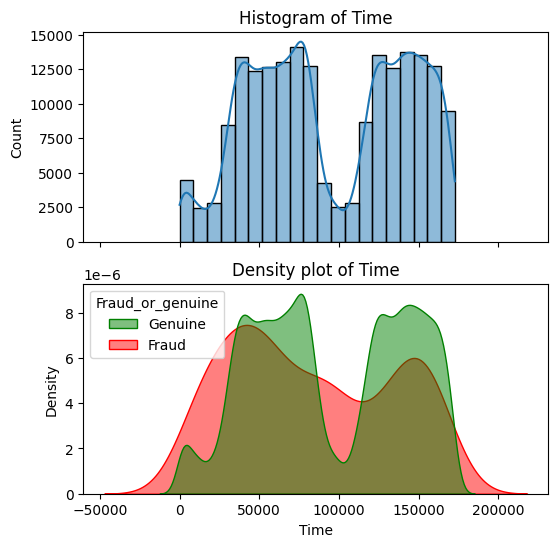

In [25]:
plot_univariate_num(df_train, 'Time', 'Fraud_or_genuine', t_test_stat_sign_lvl, color_mapping = target_class_color_mapping, bins = 20)

**Observations:**  
1. The difference in mean of time when categorized by fraud or genuine is found to be statistically significant.   
2. Since its a two day data of transactions, we can observe bimodal distibution.  
3. Even though the genuine transaction distribution is similar on both days, the fraud transactions distribution differ for the two days and on the second day the frequeny of frauds goes down. Unfortunately, we don't have any idea about the days that this data corresponds to make more conclusions.  
4. The maximum value of 1,72,792 corresponds to almost 48 hours. So, this algins with the information given to us that data is for 2 days interval.

##### 2. Amount

P-value for two sample t-test: 0.023207228585795152
Based on the statistical significance level of 0.00167, the difference in means is not statistically significant.


Description of Amount:
count    190096.000000
mean         88.430047
std         243.327689
min           0.000000
25%           5.690000
50%          22.080000
75%          77.800000
max       18910.000000
Name: Amount, dtype: float64




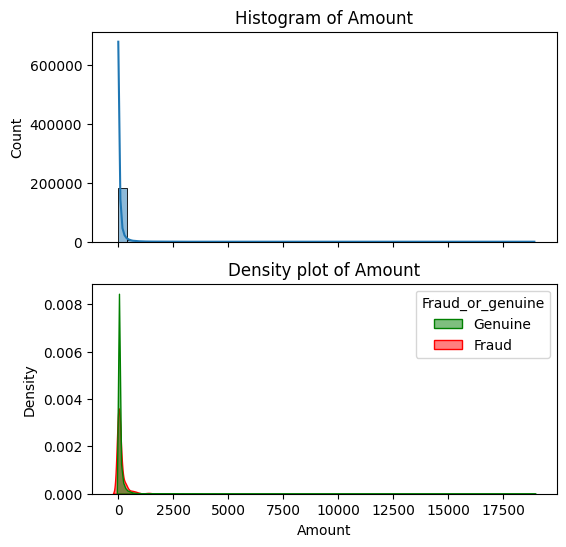

In [26]:
plot_univariate_num(df_train, 'Amount', 'Fraud_or_genuine', t_test_stat_sign_lvl, color_mapping = target_class_color_mapping, bins = 50)

**Observations:**  
1. The difference in mean of amount when categorized by fraud or genuine is found to be not statistically significant. But the statsitical signifcance is lower than 0.05 but not below our bonferroni corrected significance level. Generally, its believed that the fradulent transactions would be higher on average in amount compared to genuine transactions and this finding is thus, contrary to that belief. If I had the provision, I would have collected new data with more data size just to verify this finding before discarding the variable or talked with domain experts. So, for now I will keep the feature within our model.  
2. As expected, the distribution is highly skewed towards right. An example of pareto principle.    
3. There are transactions with 0 amount??? On a quick google search -> While no money is exchanged, these transactions are often used to perform a function like checking if a payment card is active or to document a bookkeeping entry where no net change occurs.
4. Should I transform the column using some log transformation? How would that help? It will definitely make the distirbution more closer to a normal distirbution but being skewed is that a problem for the models in concern? Being highly skewed towards right and in the case that these extreme points have quite different patterns compared to the majority of data points(i.e. they are outliers) can make the model focus more on the lower values, especially for lower bias models as there are much more number of data points there and the complexity of model is limited. Thus, the performance on extreme values can be poorer. If the objective is rather to perform well on overall range which I want for this problem, its better to transform the data.

Since the lowest value of amount column is 0. Log transformation will lead it to go to negative infinity which I don't want. I will shift it by 1 and then perform log transformation using log base 10.

In [27]:
df_train['log10_amount'] = df_train['Amount'].map(lambda x: np.log10(x + 1))

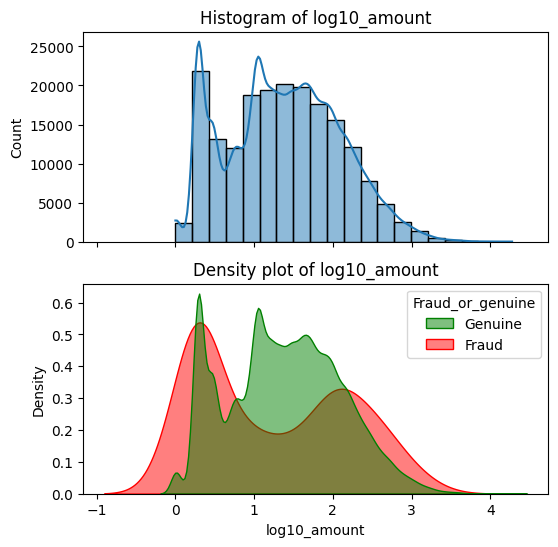

In [28]:
plot_univariate_num(df_train, 'log10_amount', 'Fraud_or_genuine', t_test_stat_sign_lvl, color_mapping = {'Genuine': 'green', 'Fraud': 'red'}, bins = 20, t_test = False, describe = False)

The distribution still looks rightly skewed. Lets take the transformation one more time.

In [29]:
df_train['log10_log10_amount'] = df_train['log10_amount'].map(lambda x: np.log10(x + 1))

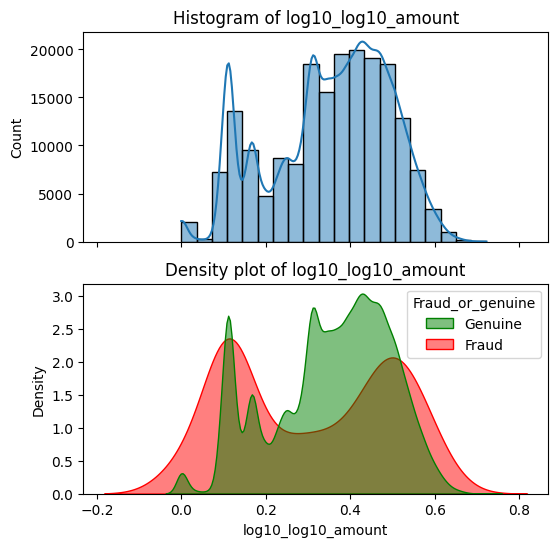

In [30]:
plot_univariate_num(df_train, 'log10_log10_amount', 'Fraud_or_genuine', t_test_stat_sign_lvl, color_mapping = {'Genuine': 'green', 'Fraud': 'red'}, bins = 20, t_test = False, describe = False)

Better. But I will still try to see whether these trasnformations do actually help in improving our model performance or not when we will build ML models.

##### 3. V1 to V28 columns

For the PCA encoded columns, column V1 to V28: I will run a for loop which goes through all these columns, finds the t-test pvalue and plot these with respect to the column names and the statistical significance threshold.

In [31]:
# Getting the p-values for all the columns
columns = ['V' + str(i) for i in range(1, 29)]
pvalues = []
for col in columns:
    pvalue = two_sample_t_test(df_train, col, 'Fraud_or_genuine')
    pvalues.append(pvalue)

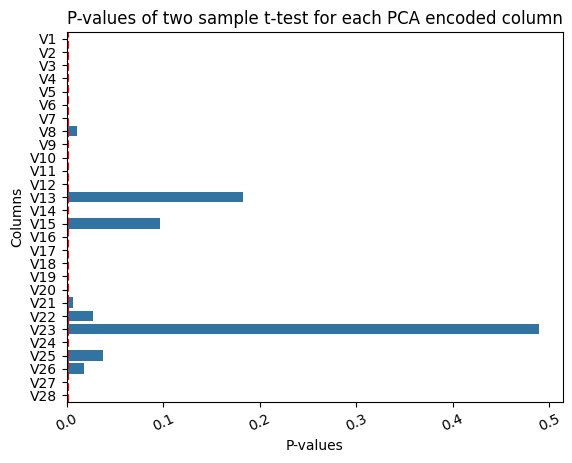

In [32]:
# Plotting the p-values
sns.barplot(x = pvalues, y = columns, orient = 'h')
plt.axvline(x = t_test_stat_sign_lvl, color = 'r', linestyle = '--')
plt.xticks(rotation = 25)
plt.xlabel('P-values')
plt.ylabel('Columns')
plt.title('P-values of two sample t-test for each PCA encoded column')
plt.show();

**Observations:**  
- We can observe that some of the columns have high p-values. Even higher than our initial significance level of 0.05. Also, there are some columns which are similar to Amount column in terms of the p-value i.e. p-value is quite low but still higher than Bonferroni corrected significance level. And as I advised earlier for Amount column, I will do the same here and preserve these columns but drop those which are above say 0.05. My advise as earlier would be to collect new set of data with greater sample size and retest as the p-value is low but above and close to border, in these cases careful retests and domain expert consultancy can help.

In [33]:
columns_drop = [col for col, pvalue in zip(columns, pvalues) if pvalue > 0.05]

In [34]:
columns_drop

['V13', 'V15', 'V23']

There are only three columns to be dropped.

In [35]:
columns_left = [col for col in columns if col not in columns_drop]

Dropping unnecessary columns.

In [36]:
df_train.drop(columns = columns_drop, inplace = True)

Lets look at the distributions of each of the columns left.

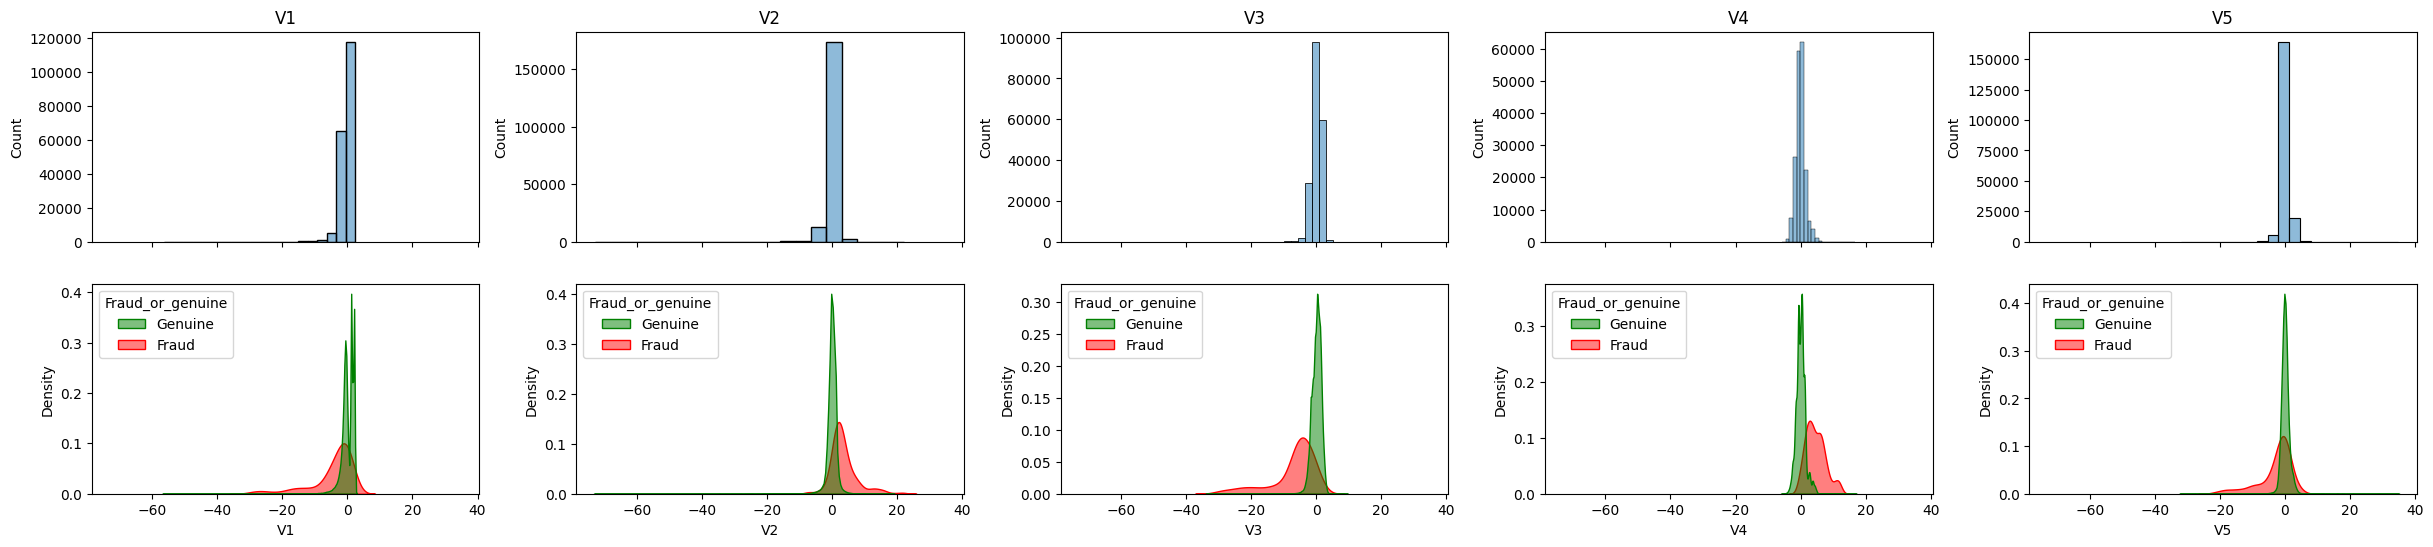

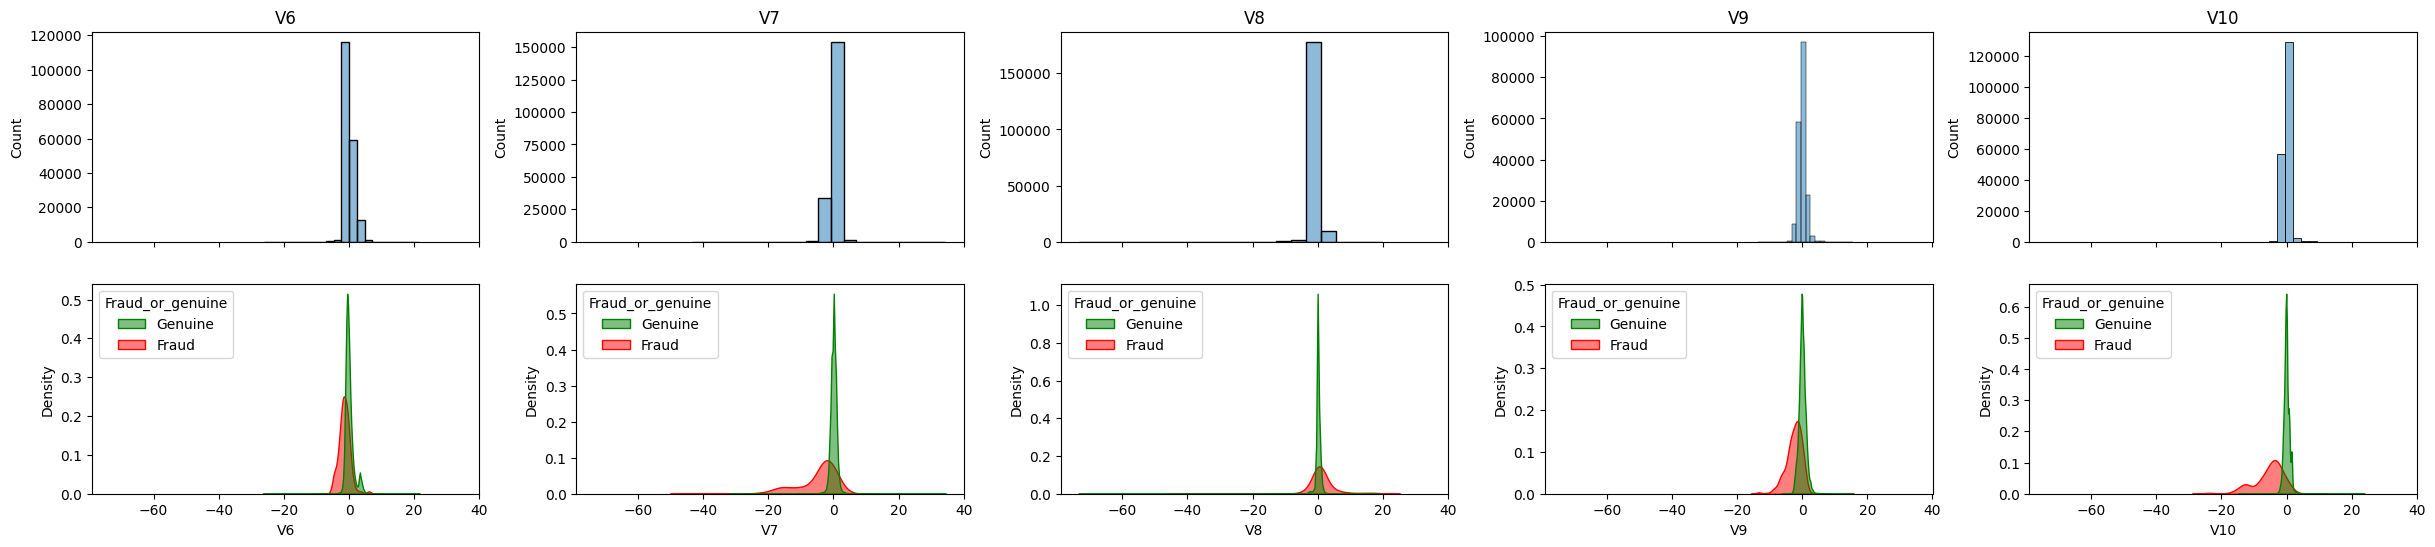

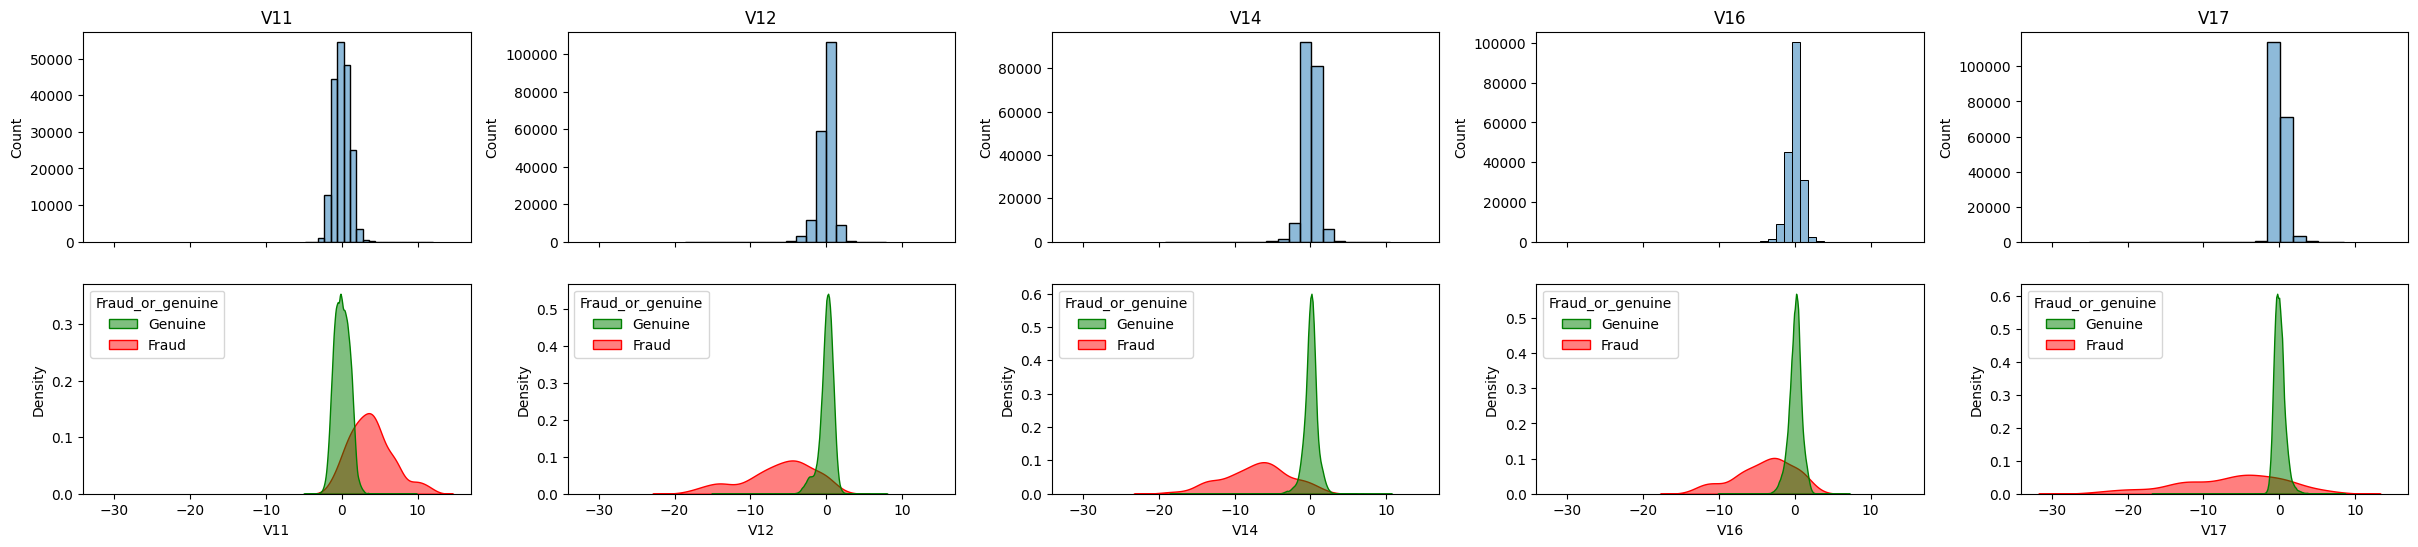

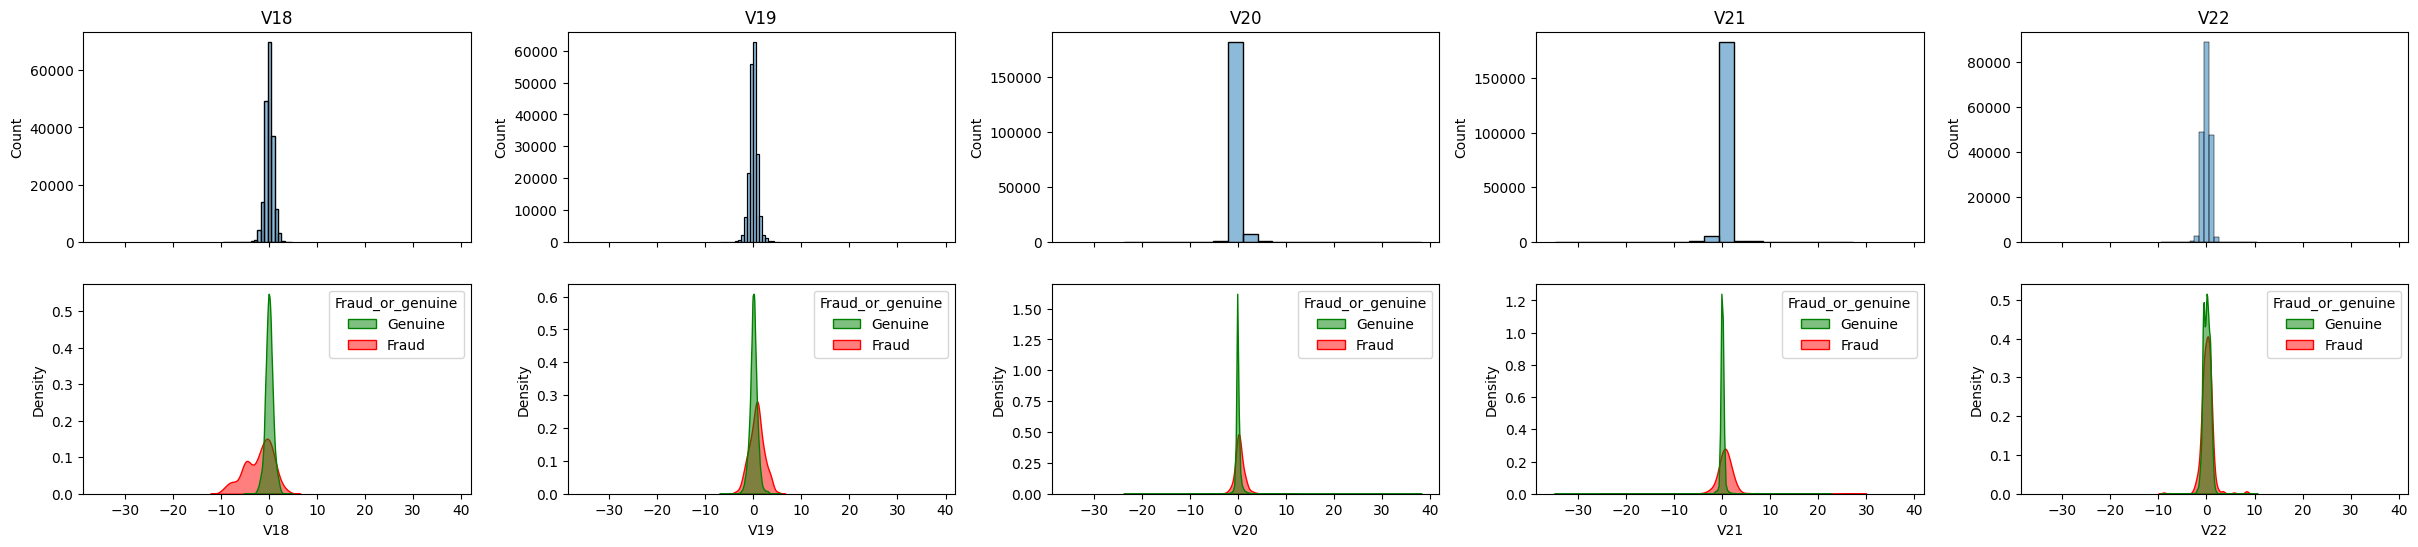

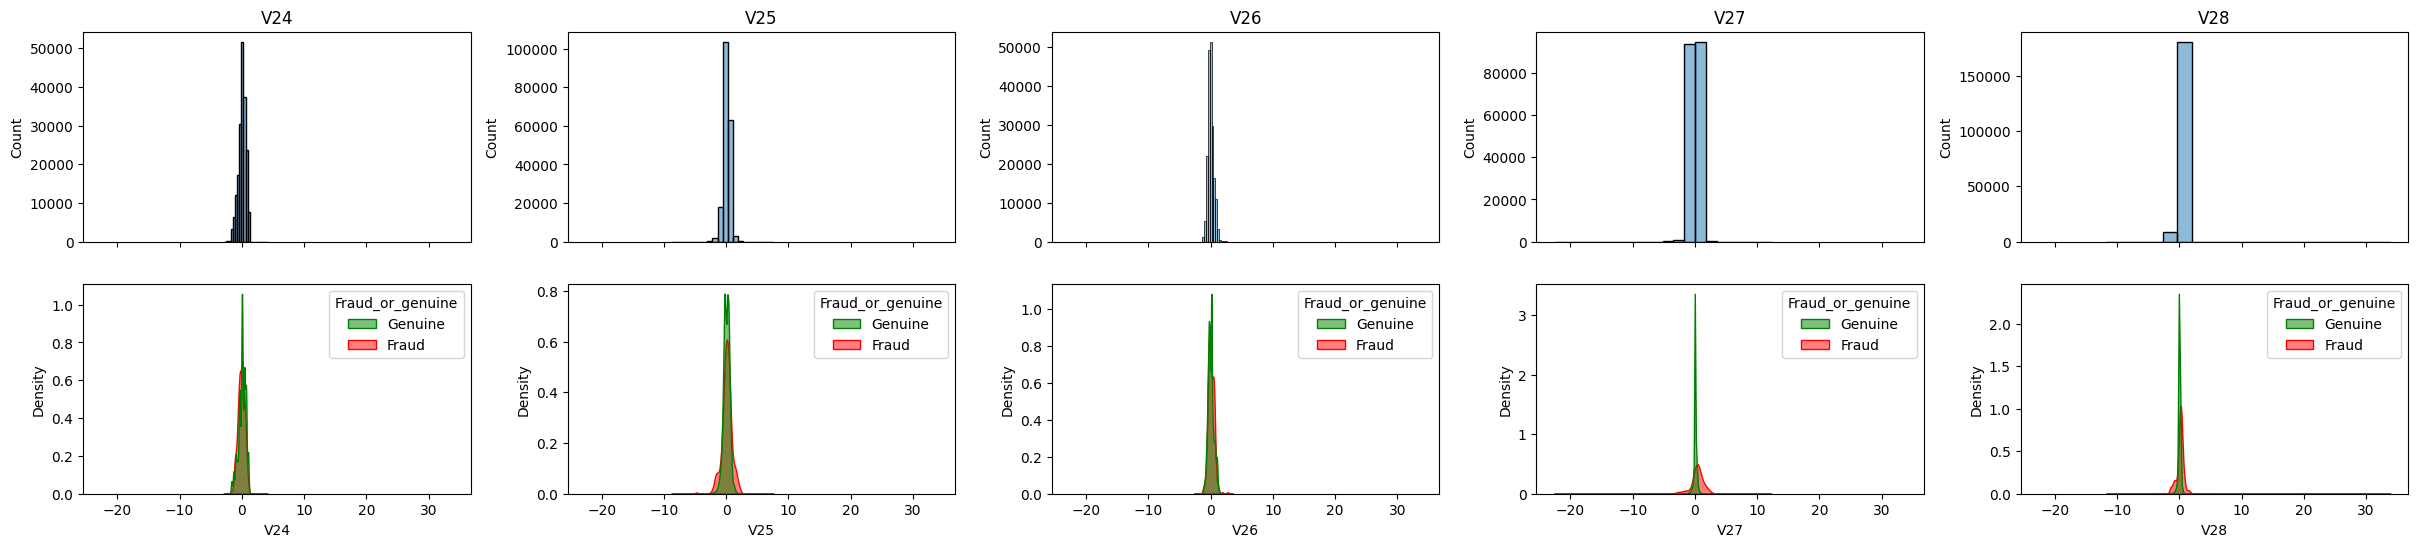

In [37]:
plot_hist_for_multi_num_cols(df_train, columns_left, 'Fraud_or_genuine', color_mapping = target_class_color_mapping, bins = 20)

**Observations:**  
1. We can make observations for each column. For example, for fraud cases V11 is likely higher than for genuine cases but these insights would be meaningless to act upon from a business perspective unless the true meanings of these columns is not known. Due to PCA encoding and confidentiality that information is not available.  
2. So what's left to observe? -> Should the features be transformed in any way that might help improve model performance as we have done for Amount column? Looking up visually at the histograms, some of the columns are highly skewed but its not noticable in histogram as the bars for the tail are too small to see. But if we look at the tails of density plots then we can observe how far the tails extend on either side. What I want is that this flatness on either side should decrease and through some transformation these extreme points should come closer to the central part so that they are not focussed less during training. All the columns are within range of -100 to 100. There is no need of log transformation as the scales of 10s is not that big and the variables range on both positive and negative side. What if we use a cube root transformation? We cannot use even roots as we have data in negative range as well.

In [38]:
df_train[columns_left] = np.cbrt(df_train[columns_left])

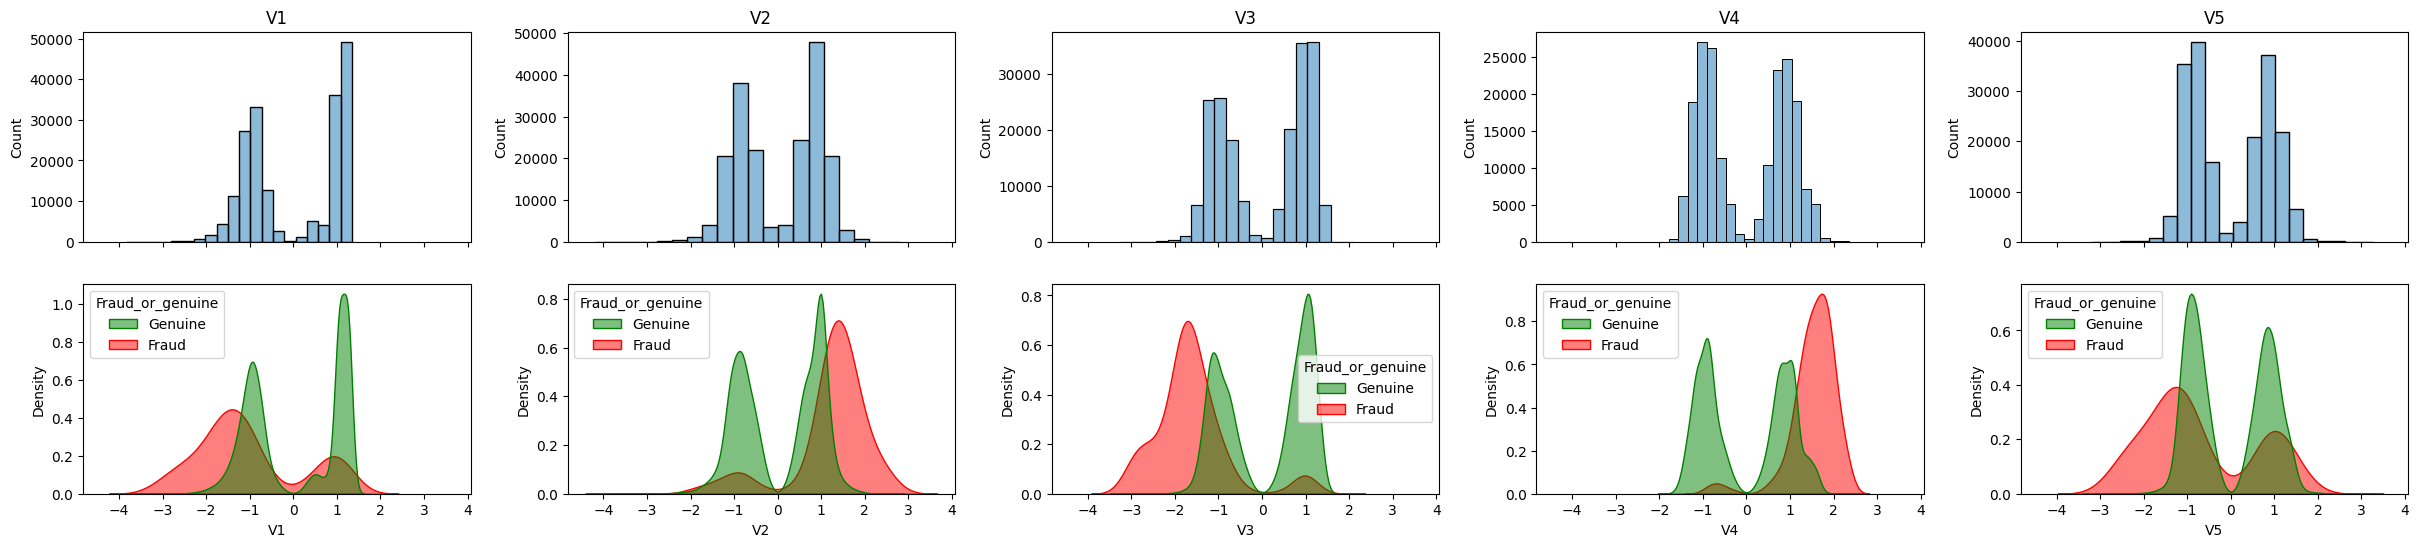

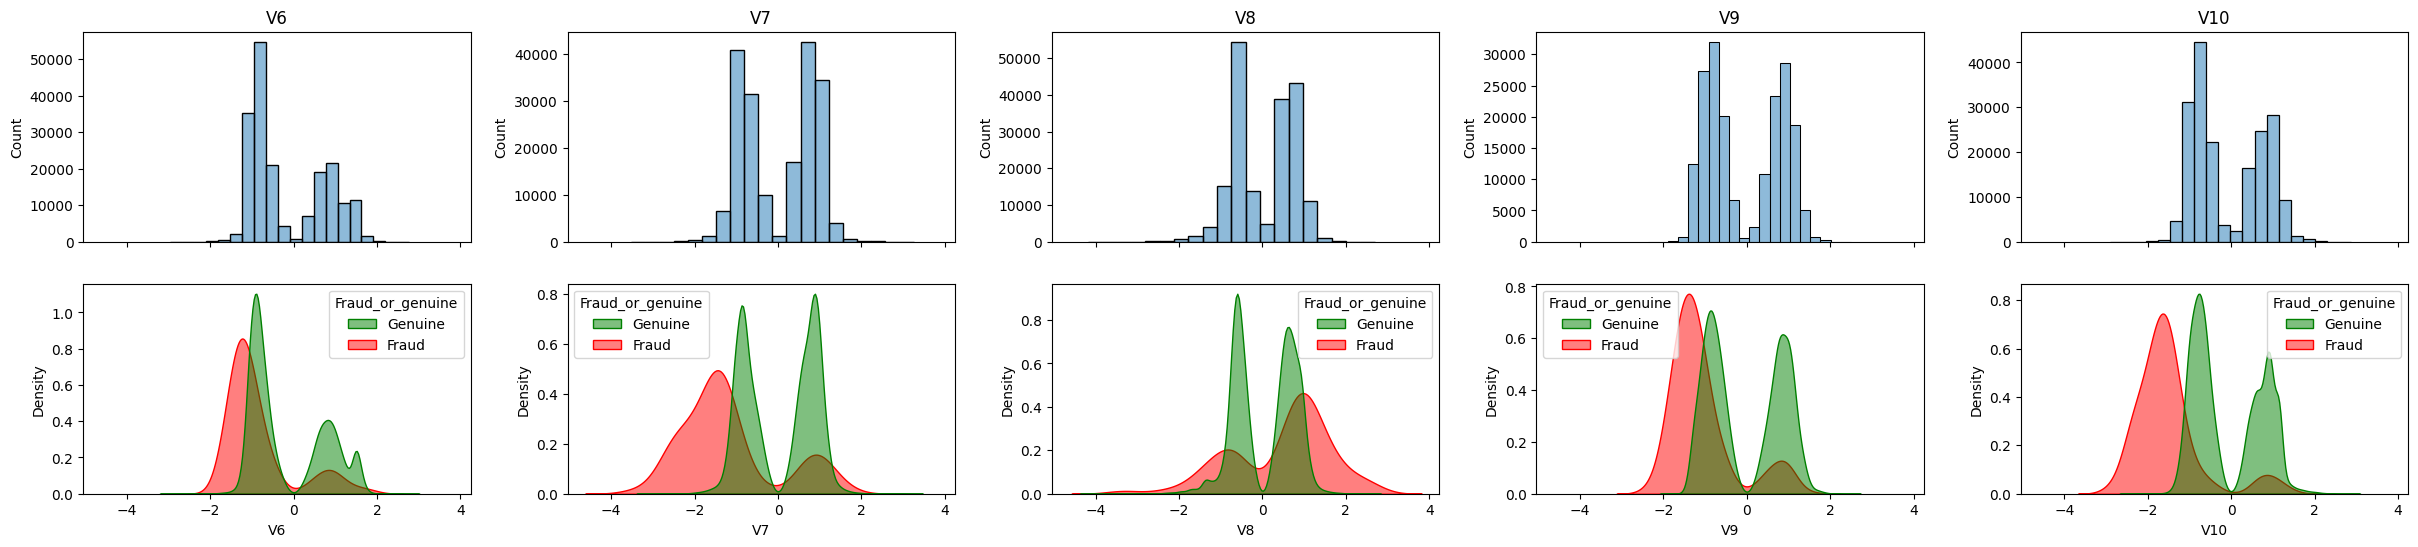

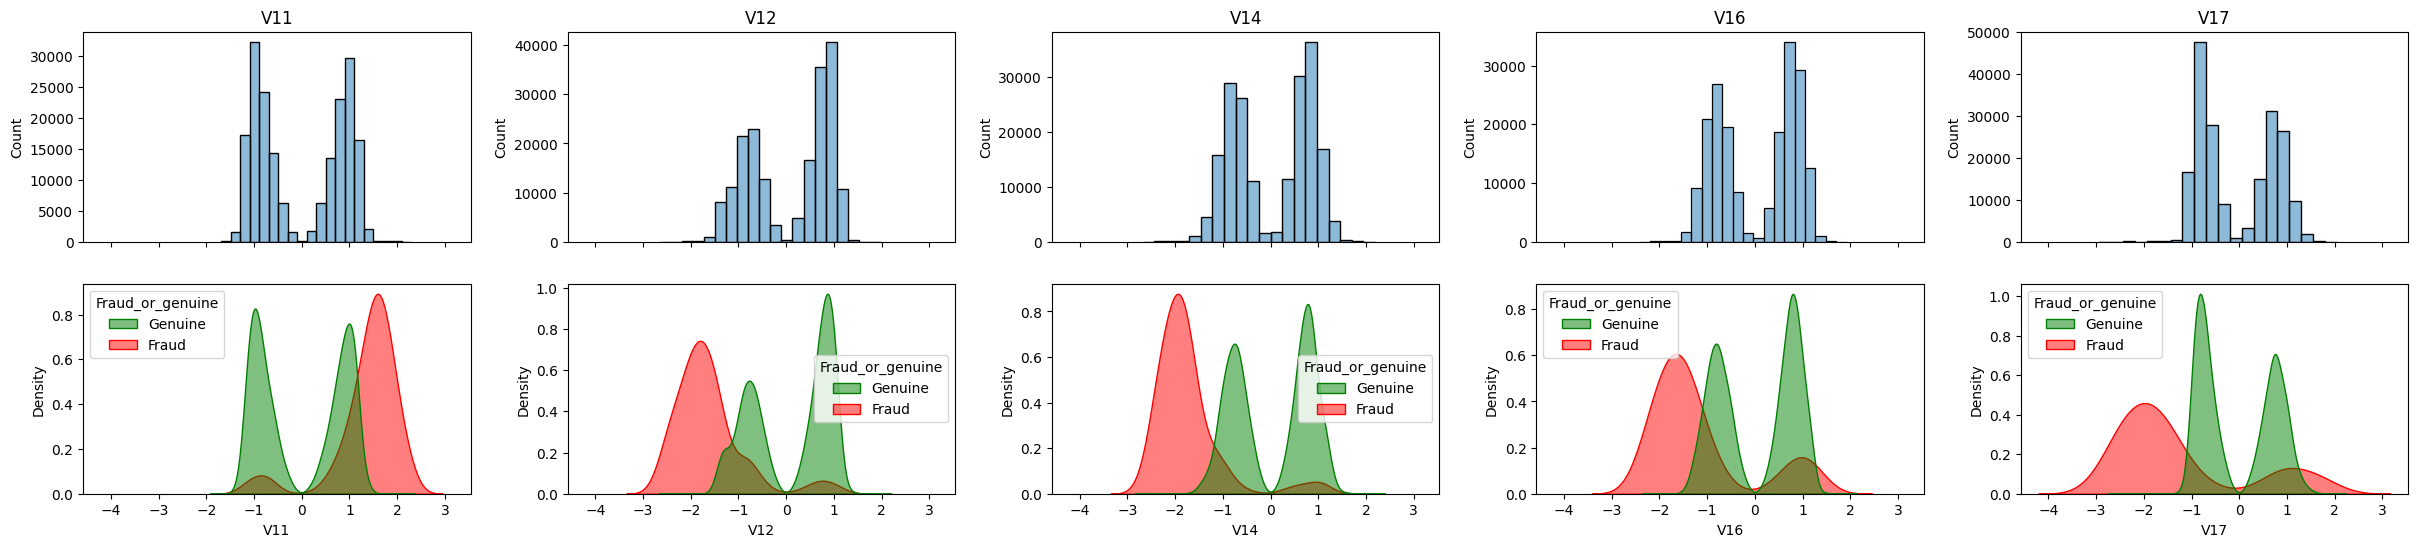

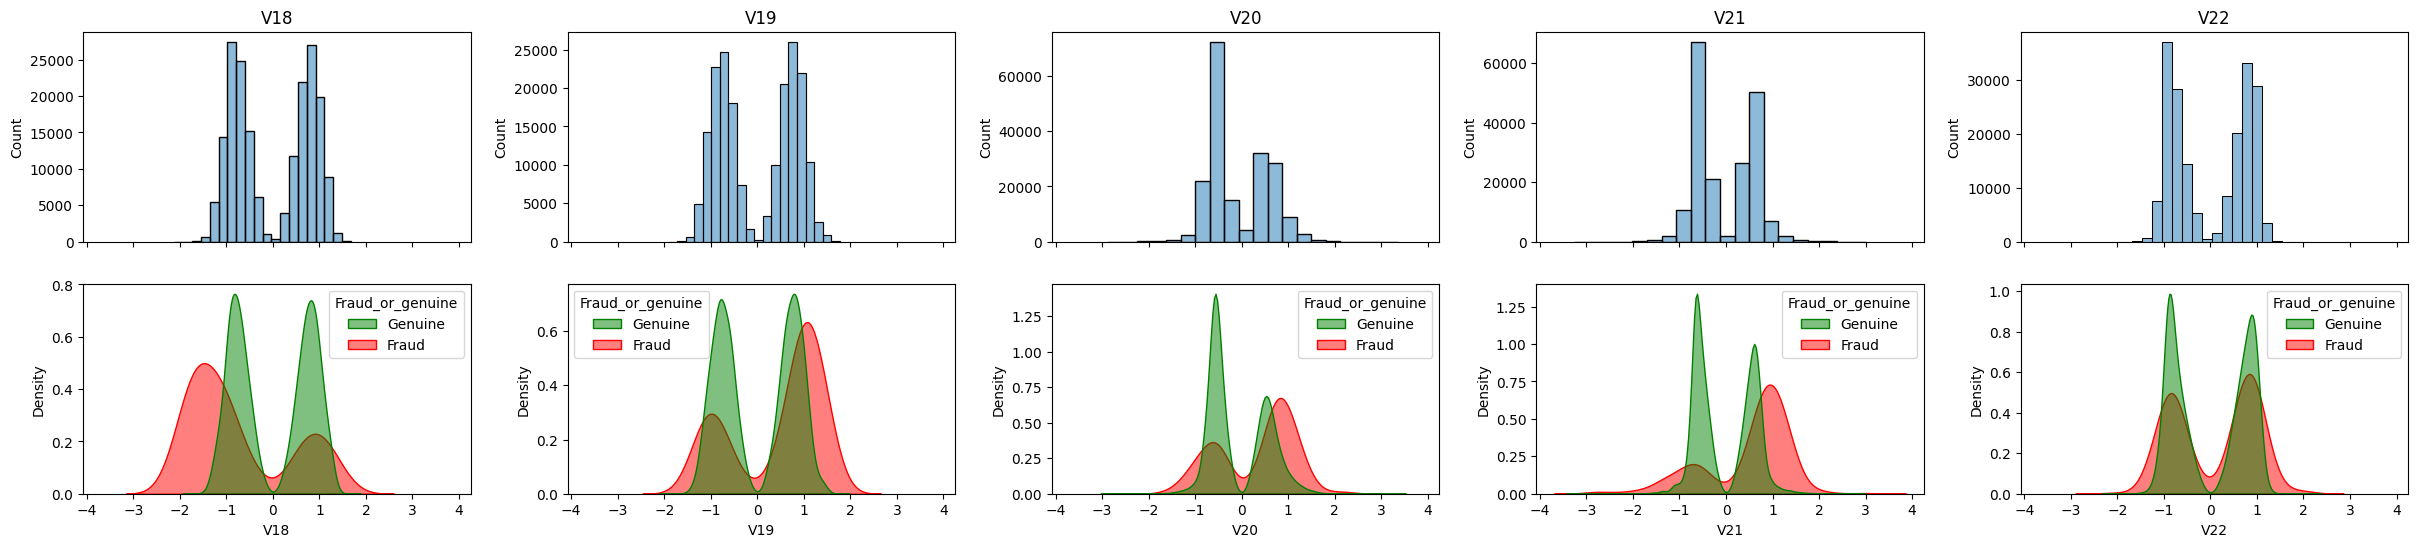

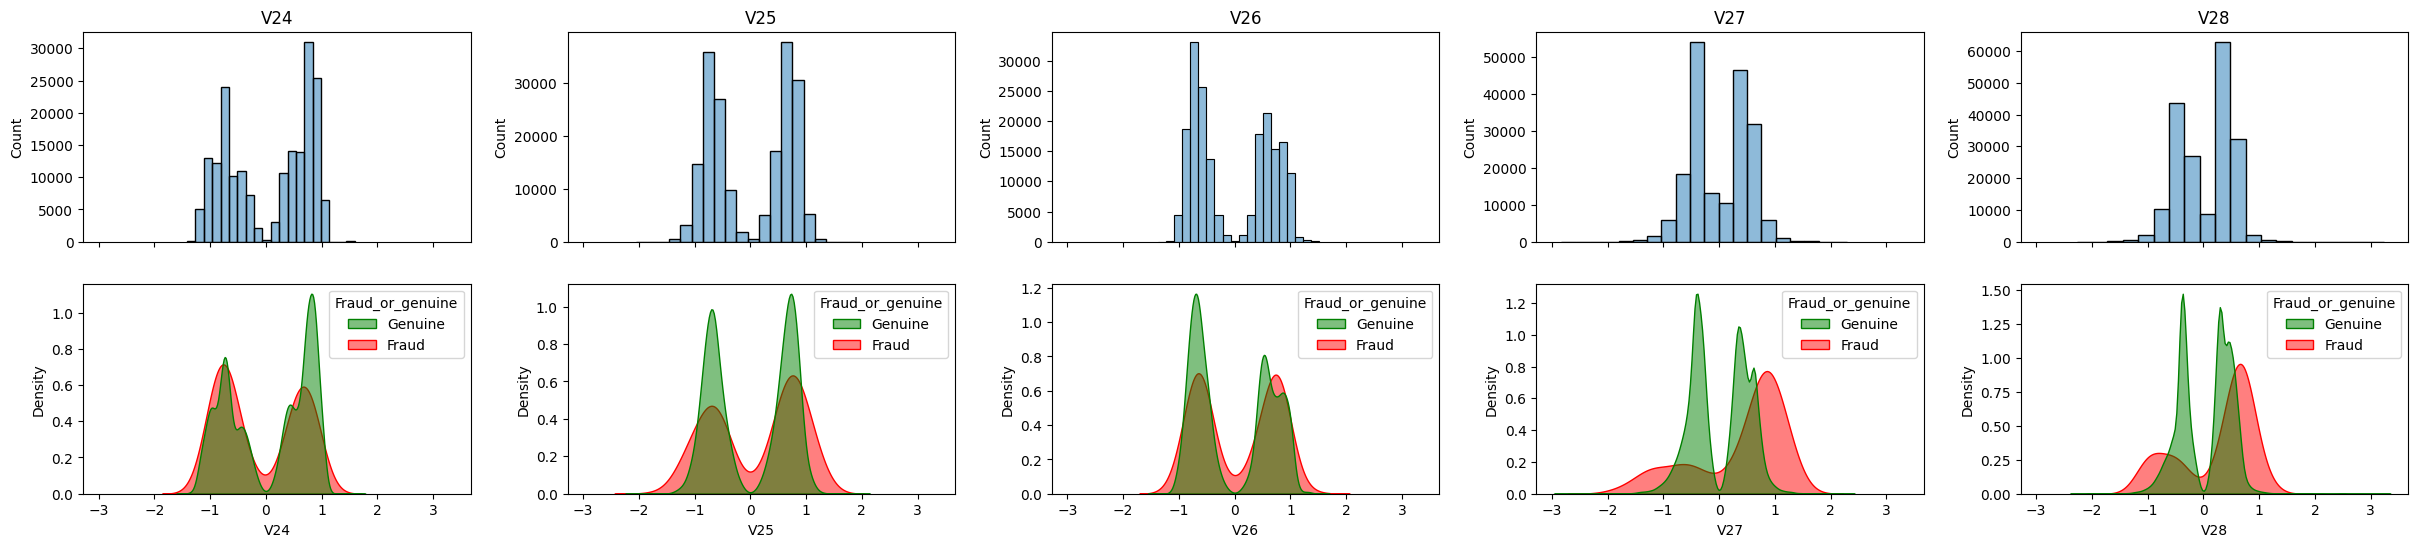

In [39]:
plot_hist_for_multi_num_cols(df_train, columns_left, 'Fraud_or_genuine', color_mapping = target_class_color_mapping, bins = 20)

The columns look much better in terms of skewness getting reduced. But due to this transformation, the distribution has become bi-modal about 0. This happened because values in between -1 to 1 are pushed away from 0 while values outside -1 to 1 are pulled closer towards 0 on taking the cube root. We will keep this transformation with us and compare it with non-transformed data to understand if there is any performance improvement.

#### Bivariate Data Analysis

The objective of this section is:  
1. Understand how a pair of predictor features are related to each other.  
2. Since all the predictor features are numerical in nature, we can look at scatteplots where the points are categorized by target variable categories and this can help us get an idea about how the decision boundary might look like or even give us better glimpse into what polynomial terms and interaction terms might be needed to better model the given decision boundary. This type of analysis where finding polynomial and interaction terms is definitely good for practicing and testing your understanding with linear models like logistic regression and SVM, and can make the model more insigthful as well but it can become too complex too quickly, takes a lot of time which can simply be automated by usign a more complex model, and also does not scale well. If you want to see a glimpse of this, I practiced it in my heart disease prediction notebook here: https://www.kaggle.com/code/ayushsharma0812/detailed-logistic-regression.     
3. Since the features are hidden from us, deep diving too much doesn't make much sense for gathering insights for business related issues.  
4. I will try to do some basic things like visualize amount vs time as a scatterplot and check correlations.  

##### 1. Time vs Amount

Since, the number of data points is huge, it will be hard to visualize things on a scatteplot. Rather what we can do is take a sample of appropriate size from each target class and plot that.

In [40]:
_, predictor, _, target = train_test_split(df_train[['Time', 'log10_log10_amount']],
                                           df_train['Fraud_or_genuine'],
                                           stratify = df_train['Fraud_or_genuine'],
                                           test_size = 0.2,
                                           random_state = 42)

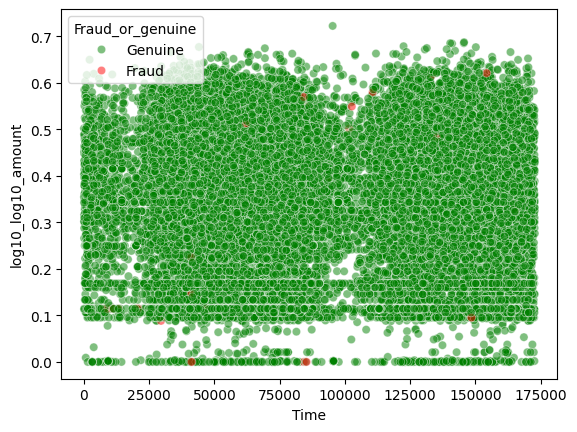

In [41]:
sns.scatterplot(x = predictor['Time'], y = predictor['log10_log10_amount'], hue = target, palette = target_class_color_mapping, alpha = 0.5);

**Observations:**  
- Even after down sampling, its still quite hard to understand and there is not a very clear pattern, from the above plot we cna observe the bimodal nature of time and faruds as seen ealrier in univariate data analysis. We can observe two time frames around 20000 sec-50000 sec & 75000 sec-100000 sec where we see more fraudulent data points and the amounts look to be either on lower side or on higher side and not much in the middle. But full picture definitely can't be seen as the number of points is too much to clearly understand things as the points might be overlapping. If I reduce the sample size further then things will be clearer but more random and thus, the patterns will be unclear at least for the fraud class.

##### 2. Correlation

Correlation will give us an idea of how much one numerical variable is linearly dependent upon the other. If the absolute value is too high say above 0.8 or 0.9, then we might decide to drop one of these variables as maintaining both would essentially be duplication of information and can lead to issues in our model coefficients and at the same time leading to higher dimensionality. Thus, correlation can be used as a means of both, feature selection and understanding of our dataset.  
Its not totally necessary to drop one of the columns because what if the part that is not explained in one variable by the other is crucial for prediction, having domain expertise and a careful analysis is essential to take such kind of decisions. We can still maintain that information in some form or another in our dataset through feature engineering, if needed.

In [42]:
df_train.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22',
       'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class',
       'Fraud_or_genuine', 'log10_amount', 'log10_log10_amount'],
      dtype='object')

In [43]:
# Numerical columns of concern right now
num_cols = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
            'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22',
            'V24', 'V25', 'V26', 'V27', 'V28', 'log10_log10_amount']

In [44]:
corr_matrix = df_train[num_cols].corr()

In [45]:
# Max correlation value
np.max(np.abs(corr_matrix.replace(1, 0).values))

np.float64(0.6240732228764101)

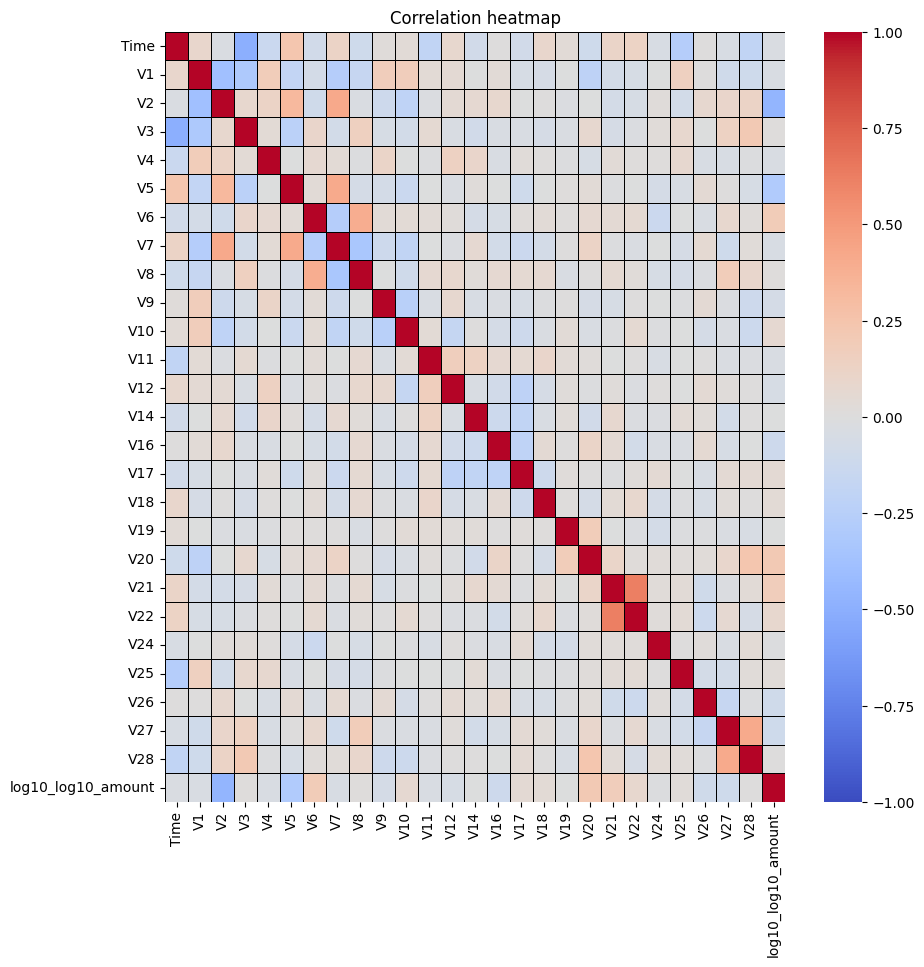

In [46]:
# Heatmap
fig = plt.figure(figsize = (10, 10)) 
ax = plt.axes()
sns.heatmap(corr_matrix, vmin = -1, vmax = 1, cmap = 'coolwarm', linewidths = 0.5, linecolor = 'black', ax = ax)
plt.title('Correlation heatmap')
plt.show();


**Observations:**  
1. The maximum correlation in terms of absolute value is 0.624 and is between V21 and V22.    
2. Correlations in between pair of columns within V1 to V28 columns should show 0 correlation as they have been generated through PCA. But here we see that there is some decent amount of correlation here and there. Why is that? This could be due to the difference in scaling of variables, since we have done cube root trasnformation the degree to which data points get pulled towards 0 depends upon how far they already are from 0. Points far away from 0 are pulled more compared to points closer to 0. Thus, these type of trasnformation can lead to correlation where there shouldn't be any. Is this a problem? If we try to visuzlize the test set then ideally it should be similar in scale and distribution as train set so similar patterns can be expected there. Thus, I think it shouldn't be a problem.   
2. The correlation in between the predictor variables is not too high that we should discard any predictor features. So, correlation was of no help for feature selection within this problem statement.  

#### Mutivariate Data analysis:

The objective of this section is:  
1. Multi-variate analysis is usually not possible as visualizing higher dimensional data after certain point is not possible. I will just conduct multi-collinearity analysis in between the predictor variables to determine if any feature can be dropped or not.

##### 1. Multi-collinearity analysis

Using VIF, I will perform multi-collinearity analysis and drop any columns whose VIF will come out to be more than 10(corresponding to 0.9 coefficient of determination (R^2)).  
VIF gives us an idea about how much one predictor variable can be explained by a linear combination of other predictor variables. A higher VIF means that the predictor variable for which the VIF is being calculated is highly explainable by other predictor variables and thus, there is duplication of information and we are inclined to drop this column if VIF is above some pre-decided threshold.

In [47]:
num_cols = handle_multi_collinearity(df_train, num_cols, 10)

No columns dropped
Final VIF:
              variables       VIF
0                 Time  5.780618
1                   V1  1.834205
2                   V2  1.823756
3                   V3  1.672795
4                   V4  1.267024
5                   V5  1.603145
6                   V6  1.421170
7                   V7  1.994216
8                   V8  1.450987
9                   V9  1.249902
10                 V10  1.465757
11                 V11  1.252614
12                 V12  1.448037
13                 V14  1.340620
14                 V16  1.385710
15                 V17  1.615506
16                 V18  1.157434
17                 V19  1.070130
18                 V20  1.335877
19                 V21  1.822617
20                 V22  1.802342
21                 V24  1.051010
22                 V25  1.144030
23                 V26  1.087985
24                 V27  1.380489
25                 V28  1.425249
26  log10_log10_amount  5.362937


**Observations:**  
1. None of the columns were dropped. Max. VIF is 5.78 and that is for time.

Now, we are ready for predictive modeling. To refer to that notebook you can go to the following link: LINK

### References

- https://www.inscribe.ai/fraud-detection/credit-fraud-detection  
- https://seon.io/resources/credit-card-fraud-detection/
- https://www.youtube.com/@krishnaik06  
- Hands on Machine Learning with Scikit-Learn & TensorFlow by Aurélien Géron (O'Reilly). CopyRight 2017 Aurélien Géron